# **전자상거래 배송 데이터 분석하기**

# **<데이터 업로드>**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Train.csv to Train (2).csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.StringIO(uploaded['Train.csv'].decode('utf8')))
data = data.drop(['ID'], axis = 1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
data.info() #결측치 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [ ]:
!pip install pandas-profiling==3.1.0

     |████████████████████████████████| 261 kB 5.3 MB/s 
     |████████████████████████████████| 303 kB 26.6 MB/s 
     |████████████████████████████████| 596 kB 45.1 MB/s 
     |████████████████████████████████| 10.9 MB 38.6 MB/s 
     |████████████████████████████████| 690 kB 40.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 102 kB 11.9 MB/s 
     |████████████████████████████████| 812 kB 42.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=4ce56ca97d960e2b192c948e50059e55533de26ee1d91ca20530f498ddc027c3
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=419fb598ce9d1555a2e92f8b37fd11bfb6dbfb77176aad33f9acce04f4599c59
 

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **<칼럼별 상관관계>**

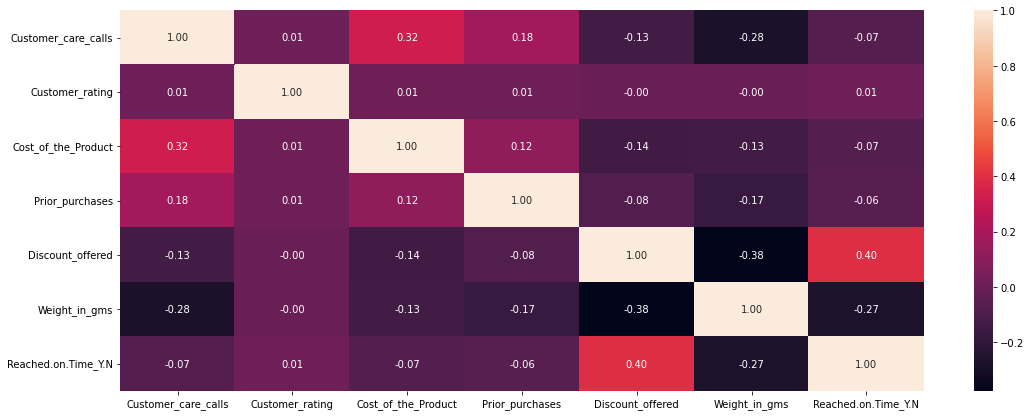

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 7))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f')
plt.show()

* ***양의 상관관계 40%*** Discount_offered - Reached on Time_YN 
* ***양의 상관관계 32%*** Cost_of_the_Product - Customer_care_calls 
* ***음의 상관관계 38%*** Discount_offered - Weight_in_gms 
* ***음의 상관관계 28%*** Customer_care_calls - Weight_in_gms 
* ***음의 상관관계 27%*** Reached on Time_YN - Weight_in_gms 


# **<Categorical 컬럼 분석>**

## **창고 블럭**

In [ ]:
data['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

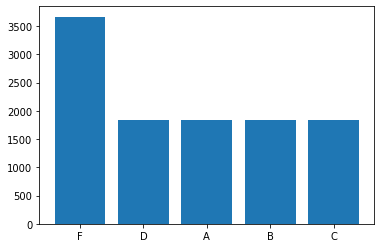

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Warehouse_block'].value_counts().index, data['Warehouse_block'].value_counts())
plt.show()

Text(0, 0.5, '')

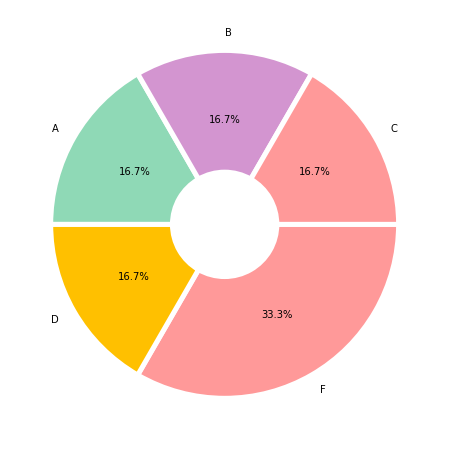

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Warehouse_block'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* **f 창고 블럭** 타 창고 블럭에 비해 확연히 많이 이용

## **배송 방법**

In [ ]:
data['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

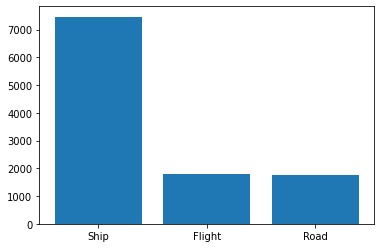

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Mode_of_Shipment'].value_counts().index, data['Mode_of_Shipment'].value_counts())
plt.show()

Text(0, 0.5, '')

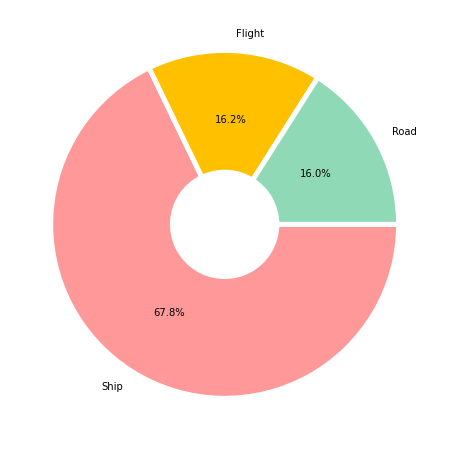

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Mode_of_Shipment'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* **ship 배송법** 타 배송 방법에 비해 뚜렷하게 많다.

## **고객 배송 문의 전화**

In [ ]:
data['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

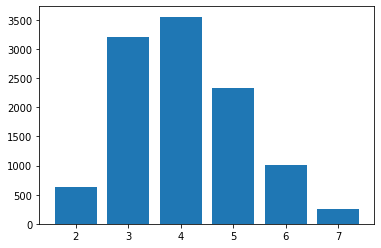

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Customer_care_calls'].value_counts().index, data['Customer_care_calls'].value_counts())
plt.show()

Text(0, 0.5, '')

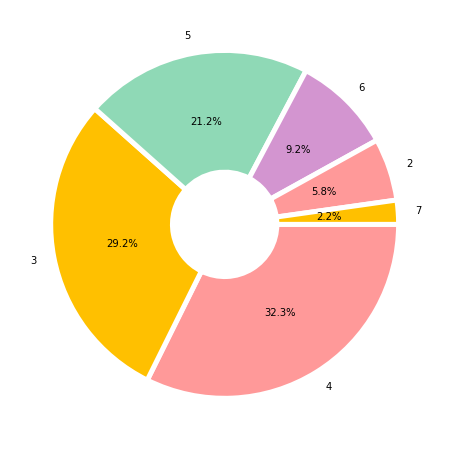

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Customer_care_calls'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 고객 배송 문의 전화 **4번** 다수

## **고객 평가**

In [ ]:
data['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

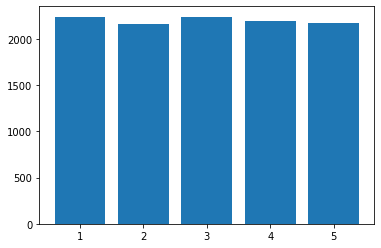

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Customer_rating'].value_counts().index, data['Customer_rating'].value_counts())
plt.show()

Text(0, 0.5, '')

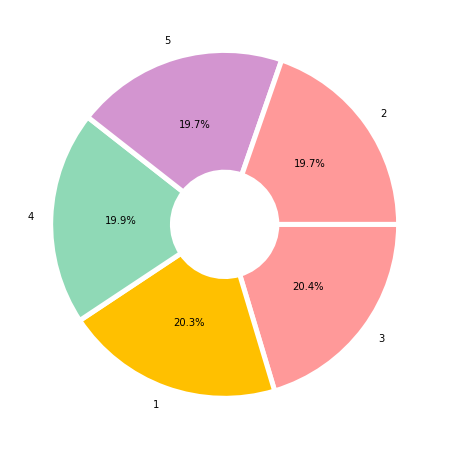

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Customer_rating'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 거의 **다 비슷비슷**

## **이전 구매 이력**

In [ ]:
data['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

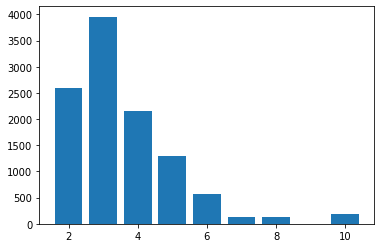

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Prior_purchases'].value_counts().index, data['Prior_purchases'].value_counts())
plt.show()

Text(0, 0.5, '')

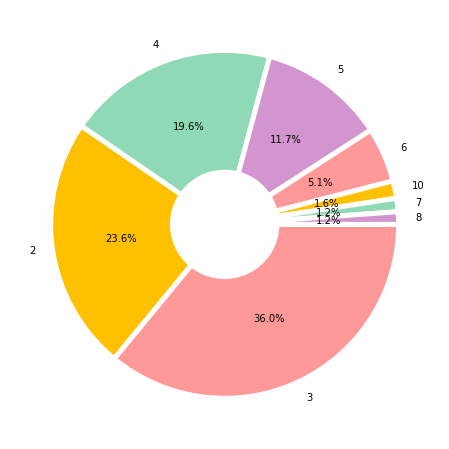

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Prior_purchases'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 보통 **3번 정도 구매이력**이 있다.

## **상품 중요도**

In [ ]:
data['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

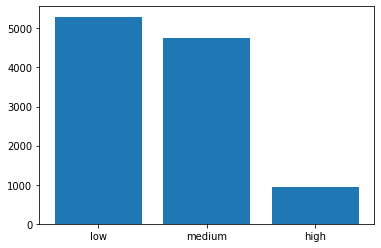

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Product_importance'].value_counts().index, data['Product_importance'].value_counts())
plt.show()

Text(0, 0.5, '')

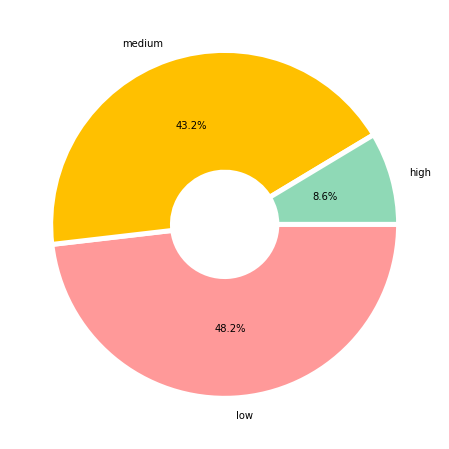

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Product_importance'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* 상품들의 **중요도가 낮다**

## **성별**

In [ ]:
data['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

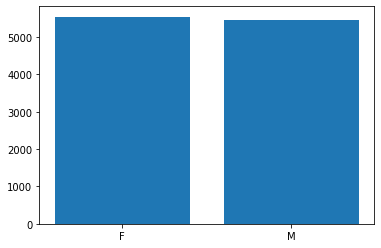

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Gender'].value_counts().index, data['Gender'].value_counts())
plt.show()

Text(0, 0.5, '')

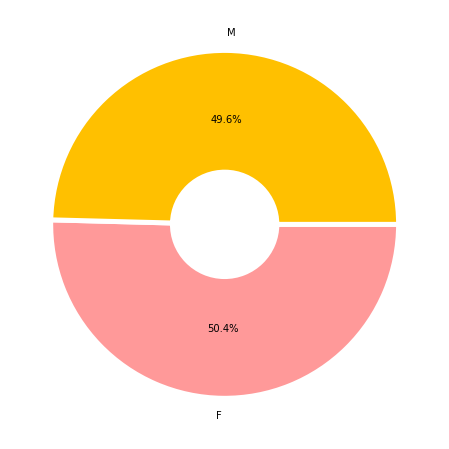

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Gender'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* **성별의 비율은 차이가 없다.**

## **제 시간에 도착하는지 여부**

In [ ]:
data['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

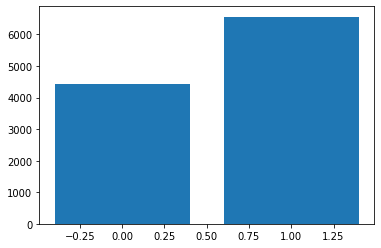

In [ ]:
import matplotlib.pyplot as plt

plt.bar(data['Reached.on.Time_Y.N'].value_counts().index, data['Reached.on.Time_Y.N'].value_counts())
plt.show()

Text(0, 0.5, '')

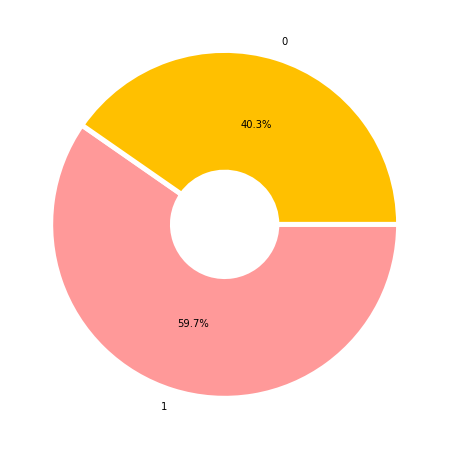

In [ ]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Reached.on.Time_Y.N'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")

* **대부분 제시간에 도착하지 않았다.**

# **<상관관계가 높은 칼럼 비교>**

## <Discount_offered - Reached.on.Time_Y.N>

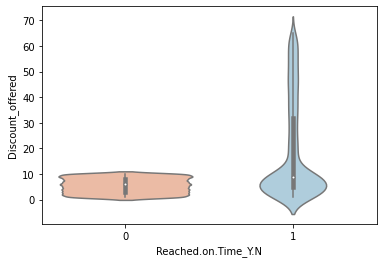

In [ ]:
sns.violinplot(data = data, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', palette = "RdBu")

***=> 할인을 더 제공받을수록 제 시간에 도착하지 않는다.***

***=> 할인을 적게 받아도 제 시간에 도착하지 않기도 한다.***

In [ ]:
data.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()

Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

***=> 할인을 더 제공받을수록 제 시간에 도착하지 않는다.***

## <Cost_of_the_Product - Customer_care_calls>

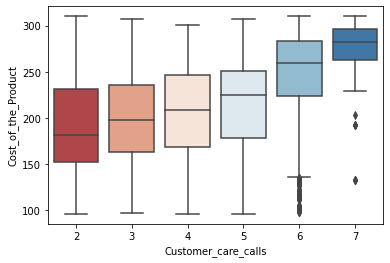

In [ ]:
sns.boxplot(data = data, x = 'Customer_care_calls', y = 'Cost_of_the_Product', palette = "RdBu")

***=> 고객은 상품이 비싸든 안 비싸든 배송 문의 전화를 몇번이고 한다.***

***=> 고객은 상품이 비쌀수록 배송 문의 전화를 더 많이 한다.***

In [ ]:
data.groupby('Customer_care_calls')['Cost_of_the_Product'].mean()

Customer_care_calls
2    189.888715
3    198.876904
4    206.396964
5    214.328608
6    246.478776
7    277.337398
Name: Cost_of_the_Product, dtype: float64

anova 진행할까?!

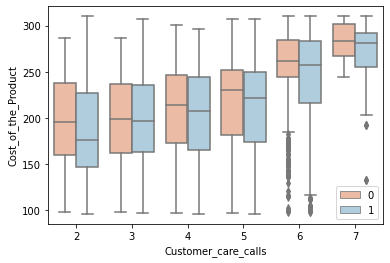

In [ ]:
sns.boxplot(data = data, x = 'Customer_care_calls', y = 'Cost_of_the_Product', hue = 'Reached.on.Time_Y.N', palette = 'RdBu')
plt.legend(loc = 'lower right')

***=> 제 시간에 상품이 도착하든 안하든, 고객은 상품의 가격이 비쌀수록 배송 문의 전화를 더 많이 한다.***

## <Discount_offered - Weight_in_gms>


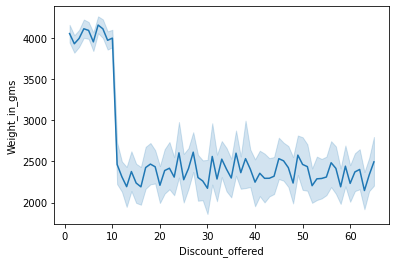

In [ ]:
sns.lineplot(data = data, x = 'Discount_offered', y = 'Weight_in_gms', palette = "RdBu")

***=> 무게가 가벼울수록 할인을 더 제공받는다.***

***=> 무게가 무거울수록 할인을 덜 제공받는다.***

-> 무슨 얘기를 하고 싶을까,,,? 생각 좀 더 해보기 !

## <Customer_care_calls - Weight_in_gms>

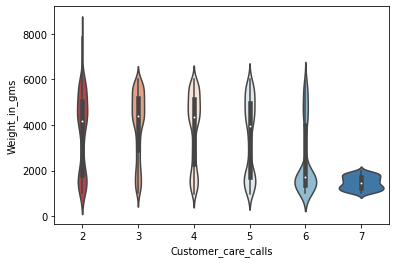

In [ ]:
sns.violinplot(data = data, x = 'Customer_care_calls', y = 'Weight_in_gms', palette = "RdBu")

***=> 고객은 상품의 무게가 적게 나갈수록 배송 문의 전화를 많이 한다***

너도 뭘 말하고 싶은거니,,?

## <Reached on Time_YN - Weight_in_gms>

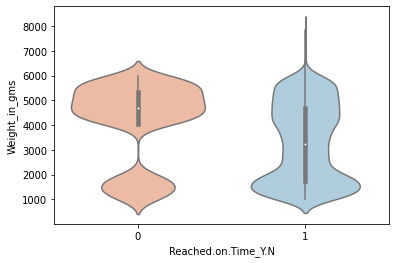

In [ ]:
sns.violinplot(data = data, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', palette = "RdBu")

***=> 상품의 무게가 커도 제 시간 안에 도착한다.***

***=> 상품의 무게가 작아도 제 시간 안에 도착하지 못한다.***

-> 상품의 무게랑 제 시간안에 도착하는 지 여부가 관련이 있는지 여부를 확인해볼까? (카이검정,,?!)

# **<기본 질문>**

- 고객 평가는 무엇인지?
- 제품이 제 시간에 배송되었는지?
- 고객 문의에 답변이 되고 있는지?
- 제품 중요도가 높은 경우, 가장 높은 평가를 받거나 정시에 배달되고 있는지?

# **<의식의 흐름 질문>**

## 어떤 유형의 창고에 중량이 몰려 있을까?

---



In [ ]:
data.groupby('Warehouse_block')['Weight_in_gms'].sum()

Warehouse_block
A     6627118
B     6664240
C     6674560
D     6655305
F    13349327
Name: Weight_in_gms, dtype: int64

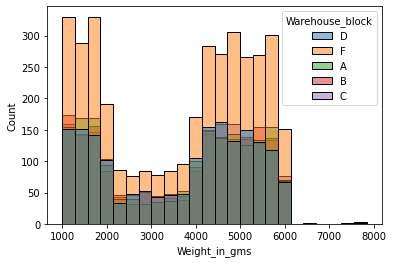

In [ ]:
sns.histplot(data = data, x = 'Weight_in_gms', hue = 'Warehouse_block')

***=> F 창고 블럭에 중량이 몰려 있다.***

## 어떤 배송 방법이 가장 많은 무게를 배송할까?

In [ ]:
data.groupby('Mode_of_Shipment')['Weight_in_gms'].sum()

Mode_of_Shipment
Flight     6449405
Road       6423209
Ship      27097936
Name: Weight_in_gms, dtype: int64

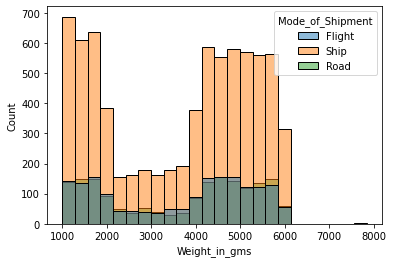

In [ ]:
sns.histplot(data = data, x = 'Weight_in_gms', hue = 'Mode_of_Shipment')

***=> 배로 가장 많은 중량을 배송한다.***

## 상품 가격이 창고 블럭에 영향이 있을까?

## 상품 가격이 배송 방법에 영향이 있을까?

## 고객 배송 문의 전화가 평가에 영향이 있을까?

## 배송방법이 평가에 영향이 있을까?

## 제 시간 도착 여부이 평가에 영향이 있을까?

## 성별과 고객 배송 문의 전화가 관련이 있을까?

## 성별과 배송 방법과 관련이 있을까?

## 성별과 평가에 관련이 있을까?

## 성별과 이전 구매 이력이 관련이 있을까?

## 창고 블럭과 이전 구매 이력이 관련이 있을까?

# **< 인사이트 >**